# 1.Write a python program which searches all the product under a particular product from www.amazon.in. Theproduct to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars. 

In [1]:
import selenium
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings('ignore')
import time
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, TimeoutException
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import requests

In [35]:
Product = input('Enter product name ')
driver = webdriver.Chrome()
driver.get('http://www.amazon.in/')
designation = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
designation.send_keys(Product)
search = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search.click()

Enter product name guitar


# 2.In the above question, now scrape the following details of each product listed in first 3 pages of your searchresults and save it in a data frame and csv. In case if any product has less than 3 pages in search results thenscrape all the products available under that product name. Details to be scraped are: "BrandName", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [94]:
url = []
BN = []
NOP = []
Price = []
RE = []
ED = []
AVB = []
for page in range(0,3):
    link = driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in link:
        url.append(i.get_attribute('href'))
        next_button =driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[67]/div/div/span/a[3]')
    
for x in url:
    driver.get(x)
    time.sleep(5)
    try:
        brand_name = driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[46]/div/table/tbody/tr[1]/td[2]/span')
        BN.append(brand_name.text)
    except NoSuchElementException:
        BN.append('-') 
    try:
        name_of_product = driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[1]/div/h1')
        NOP.append(name_of_product.text)
    except NoSuchElementException:
        NOP.append('-')
    try:
        price = driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[12]/div[4]/div[1]/span[2]/span[2]/span[2]')
        Price.append(price.text)
    except NoSuchElementException:
        Price.append('-')
    try:
        return_exchange = driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[4]/div[23]/div[2]/div/div/div/div[2]/div/ol/li[3]/div/span/div[2]/span')
        RE.append(return_exchange.text)
    except NoSuchElementException:
        RE.append('-')
    try:
        expected = driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[2]/div[9]/div[1]/div/div/div/span/span[1]')
        ED.append(expected.text)
    except NoSuchElementException:
        ED.append('-')
    try:
        availability = driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[3]/div/div[4]/div/div[1]/span')
        AVB.append(availability .text)
    except NoSuchElementException:
        AVB.append('-')
    if page<2:
        try:
            next_button =driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[67]/div/div/span/a[3]')
            next_button.click()
        except:
            break

ValueError: Length of values (183) does not match length of index (198)

In [99]:
df = pd.DataFrame({'Brand Name': BN,'Name of the Product': NOP,'Price': Price,'Return/Exchange': RE,'Expected Delivery': ED,'Availability': AVB,'Product URL': url},index= range(1,184))
df

,Brand Name,Name of the Product,Price,Return/Exchange,Expected Delivery,Availability,Product URL
1,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","4,999",7 days Replacement,"Thursday, 7 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence,Kadence Slowhand Premium Jumbo Semi Acoustic G...,"11,999",7 days Replacement,"Saturday, 9 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Medellin,Medellin Acoustic Guitar (with guitar learning...,"2,499",7 days Replacement,"Saturday, 9 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,allmusicmart,“ALL WOODEN” 38” INCH Guitar Combo Pack For Be...,"2,850",-,8 - 11 September,In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
5,JUAREZ,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","1,999",7 days Replacement,"Wednesday, 6 September",In stock,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...,...,...
179,-,-,-,-,-,-,https://www.amazon.in/FX280-acoustic-Dreadnoug...
180,musicalworks.in,"Musical Works Guitar, Acoustic Guitar, 40 Inch...","5,782",-,"Saturday, 9 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
181,HOVNER,Hovner Carlton Special Quality Rosewood Fretbo...,"4,880",7 days Replacement,"Monday, 11 September",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
182,-,-,-,-,-,-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


In [100]:
df.to_csv('amazon_product.csv',index = False)

# 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’. 

In [61]:
driver = webdriver.Chrome()
driver.get('https://images.google.com/')

In [3]:
designation = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
designation.send_keys("fruits")
search = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div")
search.click()

# Fruits

In [ ]:
fruits= []
x = driver.find_elements(By.XPATH,' //img[@class="rg_i Q4LuWd"]')[0:10]
for y in x:
    src = y.get_attribute('src')
    fruits.append(src)


In [37]:
len(fruits)

10

In [65]:
driver.close()

In [43]:
designation = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
designation.send_keys("cars")
search = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div")
search.click()

# Cars

In [45]:
cars= []
z = driver.find_elements(By.XPATH,' //img[@class="rg_i Q4LuWd"]')[0:10]
for y in z:
    src = y.get_attribute('src')
    cars.append(src)


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
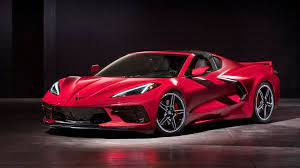
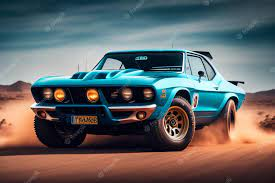
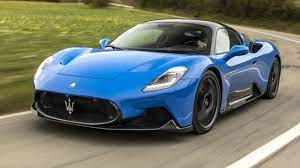
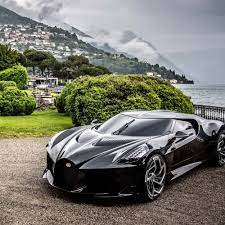
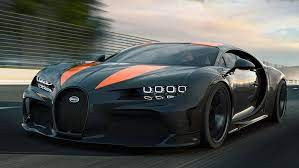
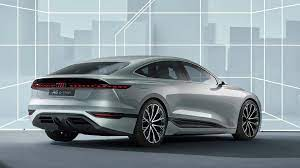
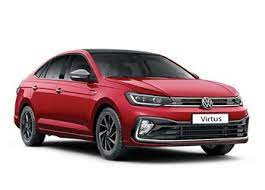
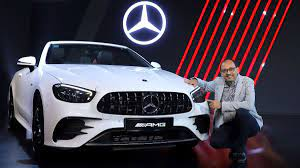
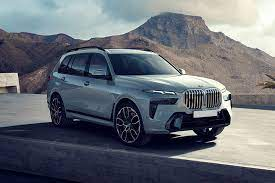
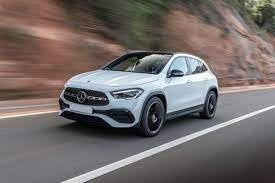

In [47]:
cars

# Machine Learning

In [51]:
designation = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
designation.send_keys("Machine Learning")
search = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div")
search.click()

In [52]:
ML= []
z = driver.find_elements(By.XPATH,' //img[@class="rg_i Q4LuWd"]')[0:10]
for y in z:
    src = y.get_attribute('src')
    ML.append(src)


['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
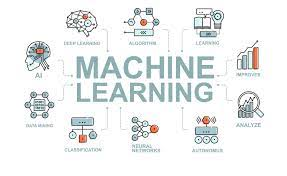
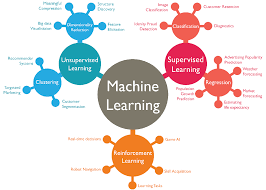
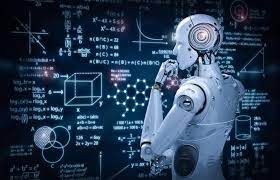
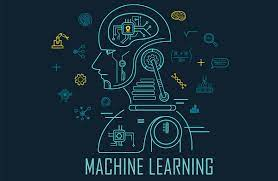
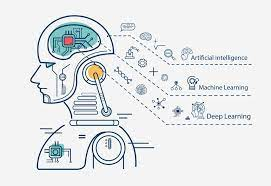
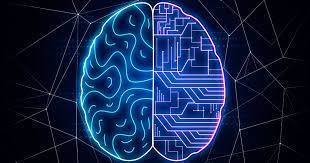
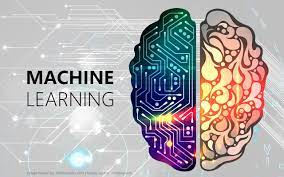
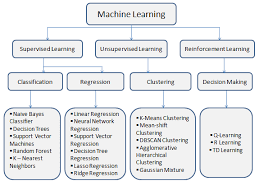
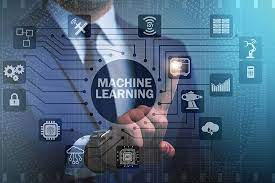
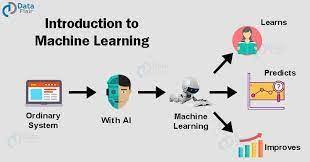

In [54]:
ML

# Guitar

In [57]:
designation = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
designation.send_keys("guitar")
search = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div")
search.click()

In [58]:
guitar= []
z = driver.find_elements(By.XPATH,' //img[@class="rg_i Q4LuWd"]')[0:10]
for y in z:
    src = y.get_attribute('src')
    guitar.append(src)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
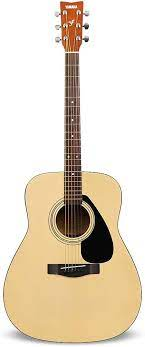
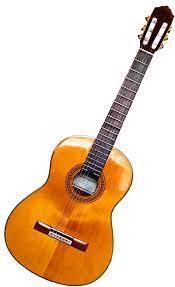
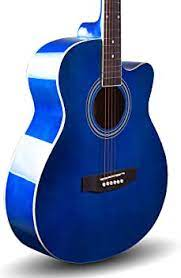
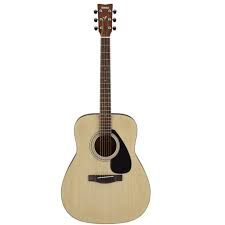
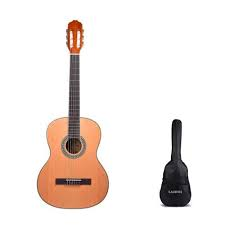
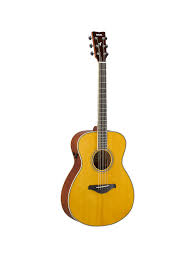
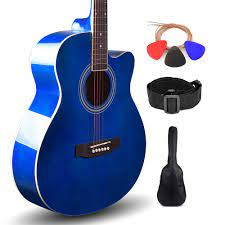
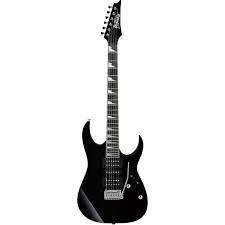
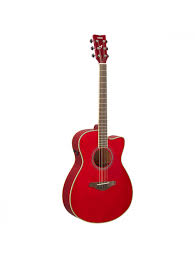
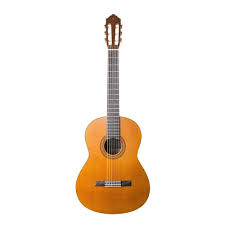

In [59]:
guitar

# Cakes

In [62]:
designation = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
designation.send_keys("cakes")
search = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div")
search.click()

In [63]:
cakes= []
z = driver.find_elements(By.XPATH,' //img[@class="rg_i Q4LuWd"]')[0:10]
for y in z:
    src = y.get_attribute('src')
    cakes.append(src)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
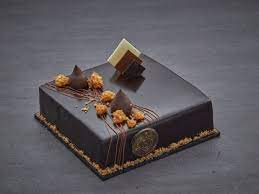
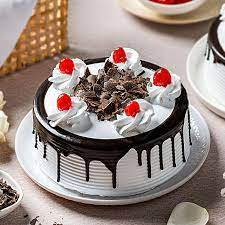
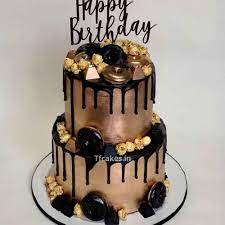
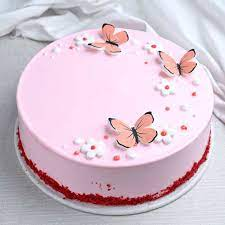
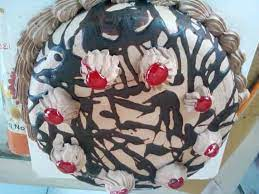
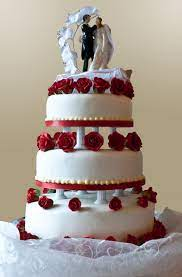
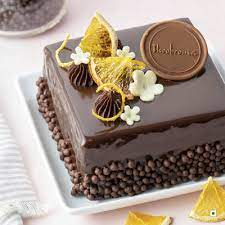
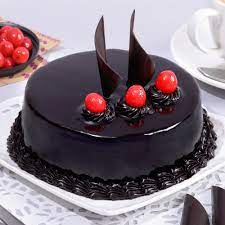
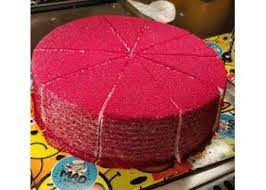
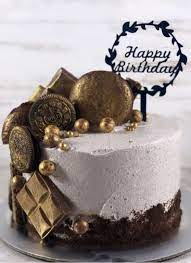

In [64]:
cakes

# 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.comand scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV. 

In [66]:
driver = webdriver.Chrome()
driver.get('http://www.flipkart.com/')

In [67]:
designation = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input")
designation.send_keys("Smartphone")
search = driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button")
search.click()

In [68]:
url = []
BN = []
SN = []
Colour = []
PC = []
SC = []
DS = []
BC = []
PRICE = []
link = driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in link:
    url.append(i.get_attribute('href'))
        
    
for x in url:
    driver.get(x)
    time.sleep(2)
    try:
        brand_name = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[1]/div[1]/div/div[4]/a')
        BN.append(brand_name.text)
    except NoSuchElementException:
        BN.append('-') 
    try:
        name_of_product = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        SN.append(name_of_product.text)
    except NoSuchElementException:
        SN.append('-')
    try:
        color = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li')
        Colour.append(color.text)
    except NoSuchElementException:
        Colour.append('-')
    try:
        button = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/button')
        button.click()
    except NoSuchElementException:
        pass
    try:
        pc = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul/li')
        PC.append(pc.text)
        sc = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[6]/td[2]/ul/li')
        SC.append(sc.text)
        ds = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[2]/table/tbody/tr[1]/td[2]/ul/li')
        DS.append(ds.text)
        bc = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[10]/table/tbody/tr[1]/td[2]/ul/li')
        BC.append(bc.text)
        
    except NoSuchElementException:
        PC.append('-')
        SC.append('-')
        DS.append('-')
        BC.append('-')
    try:
        price = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        PRICE.append(price.text)
    except NoSuchElementException:
        PRICE.append('-')

In [69]:
print(len(url),len(BN),len(SN),len(BC),len(SC),len(Colour),len(PC),len(DS),len(PRICE))

24 24 24 24 24 24 24 24 24


In [59]:
RAM = []
for x in url:
    driver.get(x)
    time.sleep(2)
    try:
        button = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/button')
        button.click()
    except NoSuchElementException:
        pass
    try:
        ram = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]/ul/li')
        RAM.append(ram.text)
    except NoSuchElementException:
        RAM.append('-')
    

In [60]:
len(RAM)

24

In [61]:
ROM = []
for x in url:
    driver.get(x)
    time.sleep(2)
    try:
        button = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/button')
        button.click()
    except NoSuchElementException:
        pass
    try:
        rom = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[1]/td[2]/ul/li')
        ROM.append(rom.text)
    except NoSuchElementException:
        ROM.append('-')
    

In [62]:
len(ROM)

24

In [76]:
import pandas as pd
df = pd.DataFrame({'Brand Name': BN,'Smartphone Name': SN,'Colour': Colour,'Primary Camera': PC,'Secondary Camera': SC,'Display Size': DS,'Battery Capacity':BC,'Price':PRICE,'Product URL': url},index = range(1,25))

In [77]:
df

,Brand Name,Smartphone Name,Colour,Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Product URL
1,SAMSUNG Mobiles,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...",Sunrise Copper,50MP + 5MP + 2MP,8MP Front Camera,16.76 cm (6.6 inch),6000 mAh,"₹9,499",https://www.flipkart.com/samsung-galaxy-f13-su...
2,SAMSUNG Mobiles,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...",Waterfall Blue,50MP + 5MP + 2MP,8MP Front Camera,16.76 cm (6.6 inch),6000 mAh,"₹9,499",https://www.flipkart.com/samsung-galaxy-f13-wa...
3,REDMI Mobiles,"REDMI 12 (Moonstone Silver, 128 GB) (4 GB RAM)",Moonstone Silver,50MP + 8MP + 2MP,"8MP Front Camera Setup: Features: Camera, Feat...",17.25 cm (6.79 inch),5000 mAh,"₹9,999",https://www.flipkart.com/redmi-12-moonstone-si...
4,POCO Mobiles,"POCO C51 (Power Black, 64 GB) (4 GB RAM)",Power Black,8MP Dual Rear Camera,5MP Front Camera,16.56 cm (6.52 inch),5000 mAh,"₹6,499",https://www.flipkart.com/poco-c51-power-black-...
5,POCO Mobiles,"POCO C51 (Royal Blue, 64 GB) (4 GB RAM)",Royal Blue,8MP Dual Rear Camera,5MP Front Camera,16.56 cm (6.52 inch),5000 mAh,"₹6,499",https://www.flipkart.com/poco-c51-royal-blue-6...
6,POCO Mobiles,"POCO C50 (Royal Blue, 32 GB) (2 GB RAM)",Royal Blue,8MP Dual Camera,5 MP Camera Setup,16.56 cm (6.52 inch),5000 mAh,-,https://www.flipkart.com/poco-c50-royal-blue-3...
7,POCO Mobiles,"POCO C55 (Cool Blue, 128 GB) (6 GB RAM)",Cool Blue,50MP Dual Rear Camera,5MP Front Camera: Camera Features: Portrait Mo...,17.04 cm (6.71 inch),5000 mAh,"₹8,499",https://www.flipkart.com/poco-c55-cool-blue-12...
8,APPLE Mobiles,"APPLE iPhone 11 (Black, 128 GB)",-,-,-,-,-,"₹40,999",https://www.flipkart.com/apple-iphone-11-black...
9,POCO Mobiles,"POCO C50 (Country Green, 32 GB) (2 GB RAM)",Country Green,8MP Dual Camera,5 MP Camera Setup,16.56 cm (6.52 inch),5000 mAh,"₹5,499",https://www.flipkart.com/poco-c50-country-gree...
10,realme Mobiles,"realme C53 (Champion Gold, 64 GB) (6 GB RAM)",Champion Gold,108MP + 2MP,8MP Front Camera,17.12 cm (6.74 inch),5000 mAh,"₹10,999",https://www.flipkart.com/realme-c53-champion-g...


In [78]:
df.to_csv('smartphone.csv',index = False)

# 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps. 

In [47]:
driver = webdriver.Chrome()
driver.get('https://www.google.com/maps')

In [48]:
location = input('Enter a city name ')
designation = driver.find_element(By.XPATH,"/html/body/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input")
designation.send_keys(location)
search = driver.find_element(By.XPATH,"/html/body/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button")
search.click()

Enter a city name hyderabad


In [49]:
import re
try:
    url_string = driver.current_url
    print('URL Etxracted :', url_string)
    lat_lng = re.findall(r'@(.*)z/data', url_string)
    coords = lat_lng[0].split(',')
    print('Latitude = ', coords[0])
    print('Longitude =', coords[1])
except:
    pass

URL Etxracted : https://www.google.com/maps/place/Hyderabad,+Telangana/@17.4127332,78.0783736,10z/data=!3m1!4b1!4m6!3m5!1s0x3bcb99daeaebd2c7:0xae93b78392bafbc2!8m2!3d17.385044!4d78.486671!16zL20vMDljNnc?entry=ttu
Latitude =  17.4127332
Longitude = 78.0783736


# 6. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [124]:
driver = webdriver.Chrome()
driver.get('https://www.digit.in/')

In [125]:
laptop = driver.find_element(By.XPATH,"/html/body/div[2]/div/ul/li[2]/span")
laptop.click()
best = driver.find_element(By.XPATH,"/html/body/div[2]/div/ul/li[2]/div[2]/div/div[1]/span[4]")
best.click()
bg = driver.find_element(By.XPATH,"/html/body/div[2]/div/ul/li[2]/div[2]/div/div[5]/div/div[2]/a/div")
bg.click()

In [127]:
url = []
link = driver.find_elements(By.XPATH,'//span[@class="datahreflink"]')
for i in range(7):
    url.append(link[i].get_attribute('data-href'))

In [129]:
len(url)

7

In [130]:
for i in range(5):
    driver.execute_script('window.scrollBy(0,100)')
MN = []
for x in url:
    driver.get(x)
    time.sleep(5)
    try:
        mn = driver.find_element(By.XPATH,'//*[@id="specs"]/div/div[1]/div[1]/table/tbody/tr[1]/td[3]')
        MN.append(mn.text)
    except NoSuchElementException:
        MN.append('-') 

In [131]:
len(MN)

7

In [132]:
for i in range(5):
    driver.execute_script('window.scrollBy(0,100)')
OS = []
for x in url:
    driver.get(x)
    time.sleep(5)
    try:
        os = driver.find_element(By.XPATH,'//*[@id="overview"]/div[2]/div[3]/div/ul/li[1]/div/p[2]/strong')
        OS.append(os.text)
    except NoSuchElementException:
        OS.append('-') 

In [133]:
len(OS)

7

In [134]:
for i in range(5):
    driver.execute_script('window.scrollBy(0,100)')
DS = []
for x in url:
    driver.get(x)
    time.sleep(5)
    try:
        ds = driver.find_element(By.XPATH,'//*[@id="overview"]/div[2]/div[3]/div/ul/li[2]/div/p[2]/strong')
        DS.append(ds.text)
    except NoSuchElementException:
        DS.append('-') 

In [135]:
len(DS)

7

In [136]:
for i in range(5):
    driver.execute_script('window.scrollBy(0,100)')
PS = []
for x in url:
    driver.get(x)
    time.sleep(5)
    try:
        ps = driver.find_element(By.XPATH,'//*[@id="overview"]/div[2]/div[3]/div/ul/li[3]/div/p[2]/strong')
        PS.append(ps.text)
    except NoSuchElementException:
        PS.append('-') 

In [137]:
len(PS)

7

In [138]:
for i in range(5):
    driver.execute_script('window.scrollBy(0,100)')
MM = []
for x in url:
    driver.get(x)
    time.sleep(5)
    try:
        mm = driver.find_element(By.XPATH,'//*[@id="overview"]/div[2]/div[3]/div/ul/li[4]/div/p[2]/strong')
        MM.append(mm.text)
    except NoSuchElementException:
        MM.append('-') 

In [139]:
len(MM)

7

In [140]:
for i in range(5):
    driver.execute_script('window.scrollBy(0,100)')
PC = []
for x in url:
    driver.get(x)
    time.sleep(2)
    try:
        pc = driver.find_element(By.XPATH,'//*[@id="overview"]/div[2]/div[4]/div/h2/strong')
        PC.append(pc.text)
    except NoSuchElementException:
        PC.append('-') 

In [141]:
len(PC)

7

In [142]:
import pandas as pd
df = pd.DataFrame({'Model Name':MN,'Operating System':OS, 'Display':DS,'Processor':PS,'Memory':MM,'Price':PC,'Product Url':url},index = range(1,8))
df

,Model Name,Operating System,Display,Processor,Memory,Price,Product Url
1,Omen 17,Windows 11 Home,"17.3"" (2560 x 1440)",13th Gen Intel Core i7-13700HX | 5.0 GHz,1 TB SSD/16 GB DDR5,"₹ 269,777",https://www.digit.in/laptops/hp-omen-17-ck2008...
2,GT77 Titan,Windows 11 Home,"17.3"" (3840 x 2160)",12th Gen Intel Core i9-12900HX | 3.6 GHz,2 TB SSD/64 GB DDR5,"₹ 499,990",https://www.digit.in/laptops/msi-gt77-titan-12...
3,Legion 5i Pro,Windows 11 Home,"16"" (2560 x 1600)",12th Gen Intel Core i7-12700H | 4.7 GHz,1 TB SSD/32 GB DDR5,"₹ 218,000",https://www.digit.in/laptops/lenovo-legion-5i-...
4,ROG Strix Scar 18,Windows 11 Home,"18"" (1920 x 1200)",13th Gen Intel Core i9-13980HX | 2.2 GHz,1 TB SSD/32 GB DDR5,"₹ 279,990",https://www.digit.in/laptops/asus-rog-strix-sc...
5,Predator Helios Neo 16,Windows 11 Home,"16"" (2560 x 1600)",13th Gen Intel Core i7-13700HX | NA,1 TB SSD/16 GB DDR5,"₹ 149,990",https://www.digit.in/laptops/acer-predator-hel...
6,ROG Zephyrus G14,Windows 11 Home,"14"" (1920 x 1200)",AMD Ryzen 9-6900HS | 4.9 GHz,1 TB SSD/16 GB DDR5,"₹ 156,990",https://www.digit.in/laptops/asus-rog-zephyrus...
7,Cyborg 15,Windows 11 Home,"15.6"" (1920 x 1080)",12th Gen Intel Core i7-12650H | 4.7 GHz,1 TB SSD/16 GB DDR5,"₹ 130,990",https://www.digit.in/laptops/msi-cyborg-15-12t...


# 7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [4]:
driver = webdriver.Chrome()
driver.get('https://www.forbes.com/billionaires/')

In [60]:
rank = []
time.sleep(2)
try:
    RANK = driver.find_elements(By.XPATH,'//div[@ class="Table_rank___YBhk Table_dataCell__2QCve"]')
    for i in RANK:
        rank.append(i.text)
except NoSuchElementException:
    rank.append('-')


In [61]:
len(rank)

200

In [10]:
name=[]

Name=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
for i in Name[0::4]:
    Name=i.text
    name.append(Name)

In [13]:
len(name)

200

In [23]:
networth=[]

nw=driver.find_elements(By.XPATH,'//div[@class="Table_netWorth___L4R5 Table_dataCell__2QCve"]')
for i in nw:    
    nw=i.text
    networth.append(nw)

In [24]:
len(networth)

200

In [31]:
age=[]

Age=driver.find_elements(By.XPATH,'//div[@class="Table_dataCell__2QCve"]')
for i in Age[1::4]:    
    Age=i.text
    age.append(Age)

In [33]:
len(age)

200

In [38]:
ctz=[]

CTZ=driver.find_elements(By.XPATH,'//div[@ class="TableRow_cell__db-hv Table_cell__houv9" ]')
for i in CTZ[4::7]:    
    CTZ=i.text
    ctz.append(CTZ)

In [40]:
len(ctz)

200

In [47]:
src=[]

SRC=driver.find_elements(By.XPATH,'//div[@ class="TableRow_cell__db-hv Table_cell__houv9" ]')
for i in SRC[5::7]:    
    SRC=i.text
    src.append(SRC)

In [58]:
len(src)

200

In [54]:
ind = []
IND=driver.find_elements(By.XPATH,'//div[@ class="TableRow_cell__db-hv Table_cell__houv9" ]')
for i in IND[6::7]:    
    IND=i.text
    ind.append(IND)

In [57]:
len(ind)

200

In [62]:
import pandas as pd
df = pd.DataFrame({'Rank':rank,'Name':name, 'Networth':networth,'Age':age,'Citizenship':ctz,'Source':src,'Industry':ind},index = range(1,201))
df

,Rank,Name,Networth,Age,Citizenship,Source,Industry
1,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
2,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
3,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
4,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
5,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
196,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
197,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
198,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
199,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


# 8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video. 

In [103]:
driver = webdriver.Chrome()
driver.get('https://www.youtube.com/watch?v=3v--OCXUgYY&t=4345s')

In [104]:
Comm = []
for i in range(100):
    driver.execute_script('window.scrollBy(0,100)')
    time.sleep(2)
    try:
        comm_elements = driver.find_elements(By.XPATH,'//div[@class="style-scope ytd-expander"]')
        for z in comm_elements:
            if len(Comm) < 500:
                comm = z.text
                Comm.append(comm)
            else:
                break
    except NoSuchElementException:
        Comm.append('_')

In [108]:
len(Comm)

500

In [113]:
Up = []
for i in range(100):
    driver.execute_script('window.scrollBy(0,100)')
    time.sleep(2)
    try:
        up_elements = driver.find_elements(By.XPATH,'//*[@id="vote-count-middle"]')
        for z in up_elements:
            if len(Up) < 500:
                up = z.text
                Up.append(up)
            else:
                break
    except NoSuchElementException:
        Up.append('_')

In [115]:
len(Up) 

500

In [128]:
import time
Tm = []
for i in range(100):
    driver.execute_script('window.scrollBy(0,100)')
    time.sleep(2)
    try:
        tm_elements = driver.find_elements(By.XPATH,'//*[@id="header-author"]/yt-formatted-string/a')
        for z in tm_elements:
            if len(Tm) < 500:
                tm = z.text
                Tm.append(tm)
            else:
                break
    except NoSuchElementException:
        Tm.append('_')

In [130]:
len(Tm)

500

In [131]:
df = pd.DataFrame({'Comments':Comm,'Upvote':Up, 'Time':Tm},index = range(1,501))
df

,Comments,Upvote,Time
1,,105,1 year ago (edited)
2,Thank you ma'am for delivering such a perfect ...,133,3 months ago
3,Timestamps: \n\n0:00 Introduction \n\n0:58 Con...,448,7 months ago
4,"For Boards 2023, watch only until 3:27:01\nAft...",438,1 year ago
5,Physics chemistry maths biology just wow ️ wor...,255,1 year ago
...,...,...,...
496,It's really amazing how you can make us unders...,10,1 year ago
497,Concept hua Extra Crystal Clearer...\nThanks a...,28,2 years ago
498,Ma'am thank you so much for the time stamps. T...,1,1 year ago
499,Maam your efforts & explanations are just simp...,14,2 years ago


# 9. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [150]:
driver = webdriver.Chrome()
driver.get('https://www.hostelworld.com/')

In [151]:
designation = driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input")
designation.send_keys('london')


In [152]:
button = driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[2]/div/ul/li[2]/button/div[2]")
button.click()
search = driver.find_element(By.XPATH,"/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[5]/button[1]")
search.click()

In [145]:
url = []
for page in range(2):
    link_elements = driver.find_elements(By.XPATH,'//a[@class="nuxt-link"]')
    for link_element in link_elements:
        try:
            url.append(link_element.get_attribute('href'))
            next_button = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/div[2]/button')
            next_button.click()
        except NoSuchElementException:
            url.append('-')

In [147]:
len(url) 

48

In [163]:
HN = []
time.sleep(2)
for x in url:
    driver.get(x)
    try:
        hostel_name = driver.find_element(By.XPATH,'//div[@class="property-name"]')
        HN.append(hostel_name.text)
        next_button = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[2]/div[1]/div/div/div/div/div[6]/div/div[2]/button')
        next_button.click()    
    except NoSuchElementException:
        HN.append('-')

InvalidArgumentException: Message: invalid argument
  (Session info: chrome=116.0.5845.180)
Stacktrace:
	GetHandleVerifier [0x00007FF6A17F52A2+57122]
	(No symbol) [0x00007FF6A176EA92]
	(No symbol) [0x00007FF6A163E25D]
	(No symbol) [0x00007FF6A162C80C]
	(No symbol) [0x00007FF6A162AA3B]
	(No symbol) [0x00007FF6A162B153]
	(No symbol) [0x00007FF6A163FF4B]
	(No symbol) [0x00007FF6A16AEEF7]
	(No symbol) [0x00007FF6A1696FDA]
	(No symbol) [0x00007FF6A16AEB82]
	(No symbol) [0x00007FF6A1696DB3]
	(No symbol) [0x00007FF6A166D2B1]
	(No symbol) [0x00007FF6A166E494]
	GetHandleVerifier [0x00007FF6A1A9EF82+2849794]
	GetHandleVerifier [0x00007FF6A1AF1D24+3189156]
	GetHandleVerifier [0x00007FF6A1AEACAF+3160367]
	GetHandleVerifier [0x00007FF6A1886D06+653702]
	(No symbol) [0x00007FF6A177A208]
	(No symbol) [0x00007FF6A17762C4]
	(No symbol) [0x00007FF6A17763F6]
	(No symbol) [0x00007FF6A17667A3]
	BaseThreadInitThunk [0x00007FFAFEAA7614+20]
	RtlUserThreadStart [0x00007FFAFF5A26B1+33]


In [162]:
HN

["St Christopher's Village", 'Kensal Green Backpackers', '-']